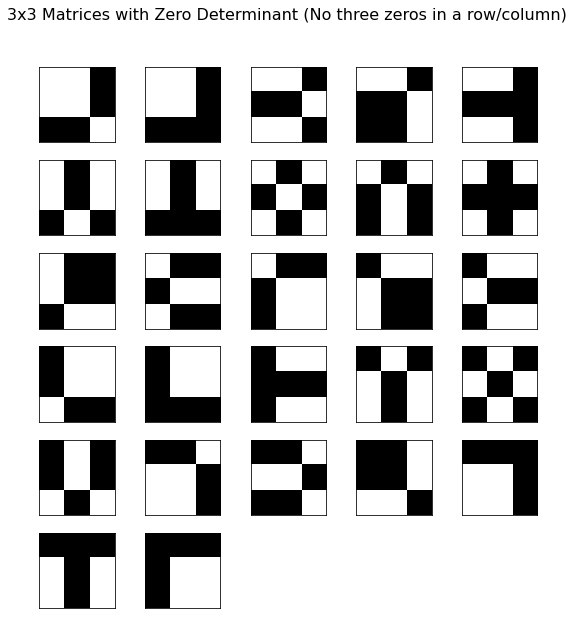

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate all 3x3 matrices
def generate_3x3_matrices():
    return [np.array(list(map(int, f"{i:09b}"))).reshape(3, 3) for i in range(512)]

# Check the determinant
def has_zero_determinant(matrix):
    return np.linalg.det(matrix) == 0

# Check if the matrix has any row or column with three zeros
def has_no_three_zeros(matrix):
    for i in range(3):
        if (np.all(matrix[i, :] == 0) or np.all(matrix[:, i] == 0)):
            return False
    return True

def has_four_zeros_five_ones(matrix):
    zeros = np.count_nonzero(matrix == 0)
    ones = np.count_nonzero(matrix == 1)
    return (zeros == 4 and ones == 5) or (zeros == 5 and ones == 4)

# Generate all 3x3 matrices
matrices = generate_3x3_matrices()

# Filter matrices with zero determinant, no three zeros in a row/column,
# and exactly four zeros and five ones, or five zeros and four ones
filtered_matrices = [
    m for m in matrices if has_zero_determinant(m) and has_no_three_zeros(m) and has_four_zeros_five_ones(m)
]


def plot_matrices_simple(matrices, title):
    num_matrices = len(matrices)
    cols = 5 
    rows = num_matrices // cols + (num_matrices % cols > 0)  
    fig, axes = plt.subplots(rows, cols, figsize=(7.5, rows * 1.5)) 
    plt.suptitle(title, fontsize=16)
    axes = axes.flatten()
    for ax, matrix in zip(axes, matrices):
        ax.matshow(matrix, cmap='gray_r')
        ax.set_xticks([])
        ax.set_yticks([])
    for ax in axes[len(matrices):]:
        ax.axis('off')  # Hide unused subplots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Display all matrices without the values
plot_matrices_simple(filtered_matrices, "3x3 Matrices with Zero Determinant (No three zeros in a row/column)")
